In [1]:
import dask.dataframe as dd
import dask.multiprocessing
import os
path = "./data/"

# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH'] 


# import xgboost as xgb


In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    

In [5]:
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

In [2]:
POS_CASH = pd.read_csv(path+ "POS_CASH_balance.csv")

In [3]:
application_train = pd.read_csv("./data/application_train.csv")
application_test = pd.read_csv("./data/application_test.csv")

In [10]:
missing_values_table(POS_CASH)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


In [22]:
cols = ['SK_ID_CURR', 'TARGET']
POS_CASH_PCA = pd.merge(POS_CASH, application_train[cols], on='SK_ID_CURR', how='left')

In [4]:
POS_CASH.CNT_INSTALMENT[POS_CASH.CNT_INSTALMENT.isnull()] = POS_CASH.CNT_INSTALMENT.mean()
POS_CASH.CNT_INSTALMENT_FUTURE[POS_CASH.CNT_INSTALMENT_FUTURE.isnull()] = POS_CASH.CNT_INSTALMENT_FUTURE.mean()
# POS_CASH_PCA.CNT_INSTALMENT[POS_CASH_PCA.CNT_INSTALMENT.isnull()] = POS_CASH_PCA.CNT_INSTALMENT.mean()
# POS_CASH_PCA.CNT_INSTALMENT_FUTURE[POS_CASH_PCA.CNT_INSTALMENT_FUTURE.isnull()] = POS_CASH_PCA.CNT_INSTALMENT_FUTURE.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


The correlation between SK_DPD and the TARGET is 0.0095
Median value for loan that was not repaid = 0.0000
Median value for loan that was repaid =     0.0000


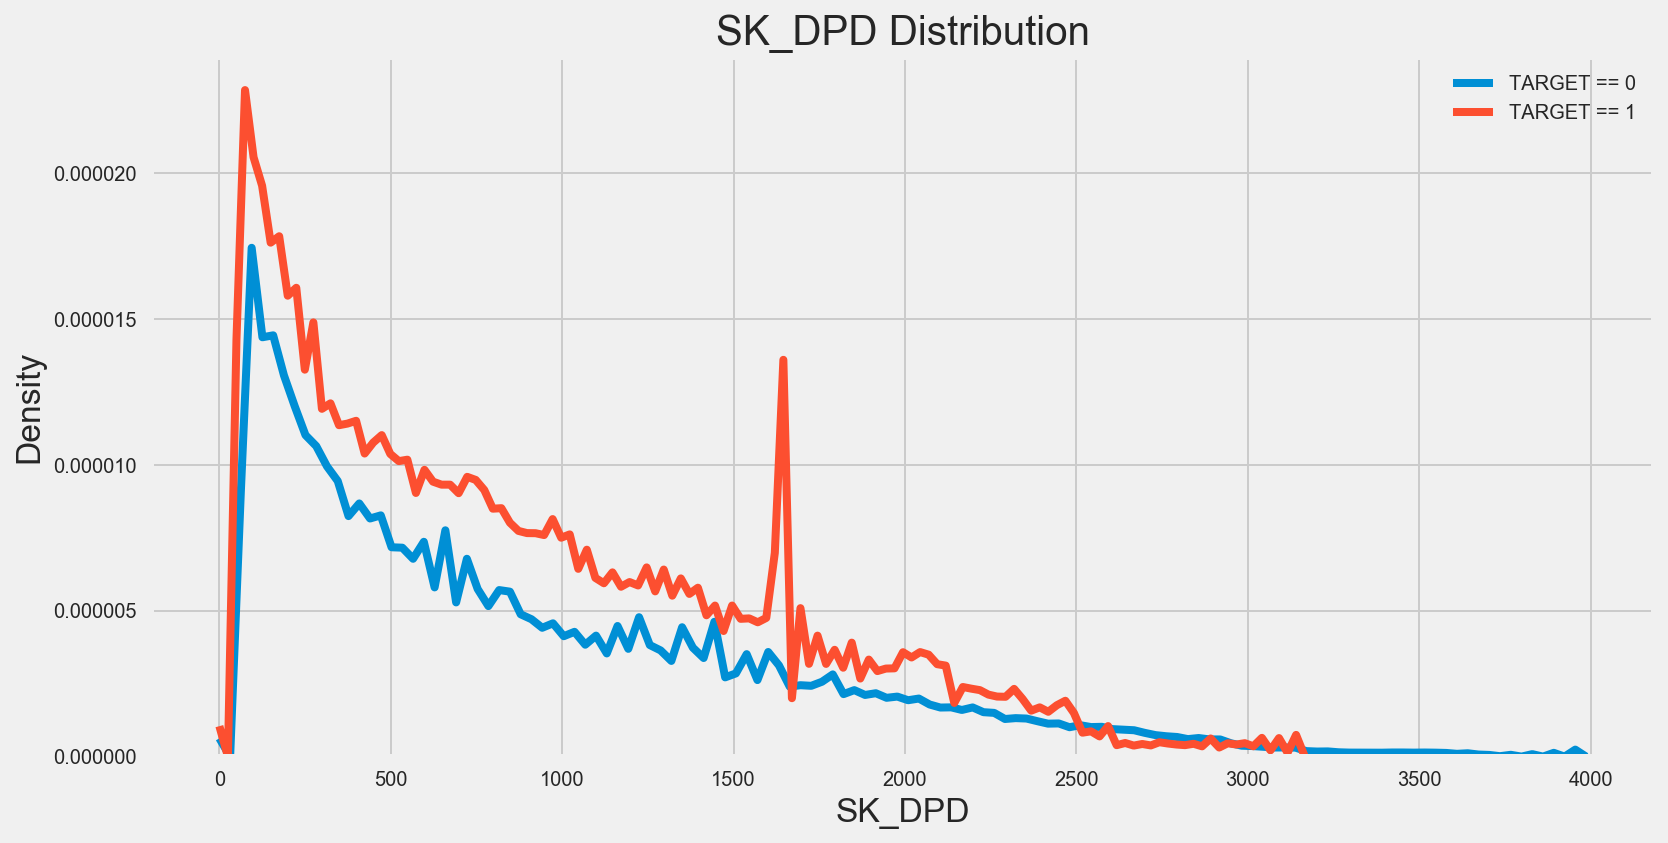

In [14]:
kde_target('SK_DPD', POS_CASH_PCA)

The correlation between SK_DPD_DEF and the TARGET is -0.0015
Median value for loan that was not repaid = 0.0000
Median value for loan that was repaid =     0.0000


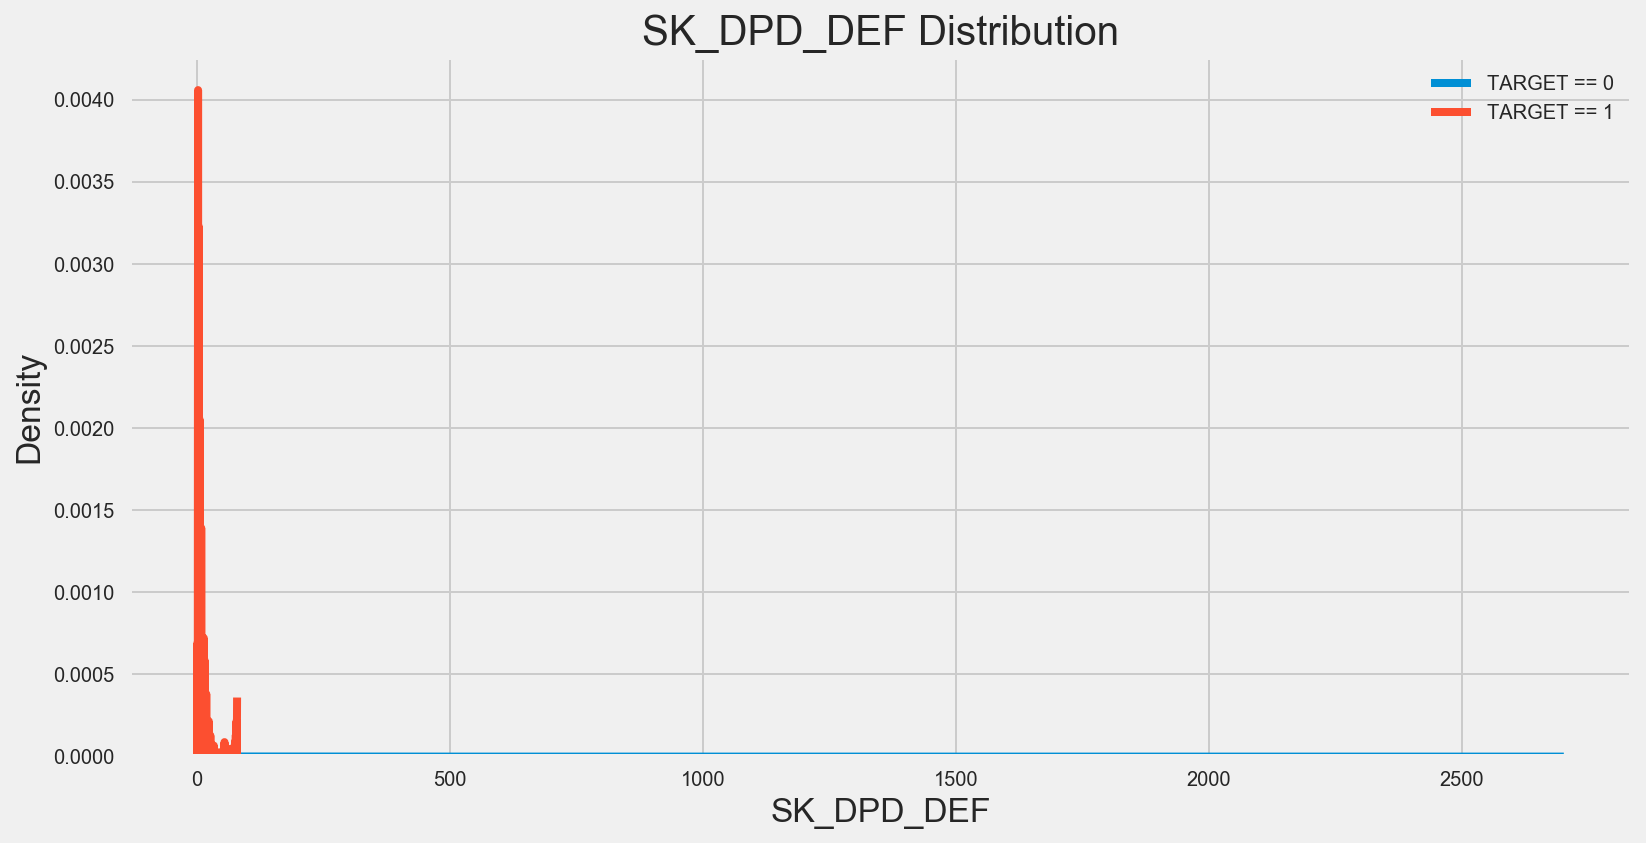

In [15]:
kde_target('SK_DPD_DEF', POS_CASH_PCA)

In [5]:
POS_CASH.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [6]:
POS_CASH = pd.get_dummies(POS_CASH)

In [7]:
cols_to_means = ['SK_ID_CURR', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']
cols_to_sums = ['SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF', 'NAME_CONTRACT_STATUS_Active',\
              'NAME_CONTRACT_STATUS_Amortized debt', 'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Canceled',\
             'NAME_CONTRACT_STATUS_Completed', 'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Returned to the store',\
              'NAME_CONTRACT_STATUS_Signed',  'NAME_CONTRACT_STATUS_XNA']


In [8]:

POS1 = POS_CASH[cols_to_means].groupby('SK_ID_CURR').mean()

# df2.data1.groupby(df2.key1).sum()
POS2 = POS_CASH[cols_to_sums].groupby('SK_ID_CURR').sum()


In [9]:
POS_CASH_DF = pd.concat( [POS1, POS2] , axis = 1)
POS_CASH_DF.reset_index(inplace = True)

In [33]:
POS_CASH_DF.to_csv('POS_CASH_balance.csv')

In [10]:

cols = ['SK_ID_CURR']
POS_CASH_balance_train = pd.merge(POS_CASH_DF, application_train[cols], on = 'SK_ID_CURR', how = 'inner')
POS_CASH_balance_test = pd.merge(POS_CASH_DF, application_test[cols], on = 'SK_ID_CURR', how = 'inner')


In [11]:
len(POS_CASH_balance_train), len(POS_CASH_balance_test), len(POS_CASH_DF)

(289444, 47808, 337252)

In [12]:
47808+ 289444

337252

In [13]:
POS_CASH_balance_train.to_csv('POS_CASH_balance_train.csv')
POS_CASH_balance_test.to_csv('POS_CASH_balance_test.csv')